## Ejercicio 3

Este ejercicio fue realizado tomando como ejemplo el articulo [Linear Regression using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931) 
haciendo las modificaciones necesarias para que se ajuste a nuestros datos.

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy.linalg import pinv
pd.set_option('display.max_columns', None)

#### Cargamos y preparamos nuestros datos

In [2]:
# Leemos los datos
df = pd.read_csv("BankChurners.csv")
# Eliminamos las variables categoricas para este ejercicio
col_to_drop = ["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]
df.drop(columns=col_to_drop, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Para este ejercicio usaremos dos columnas nuestros datos que serian "Customer_Age" y "Months_on_book"

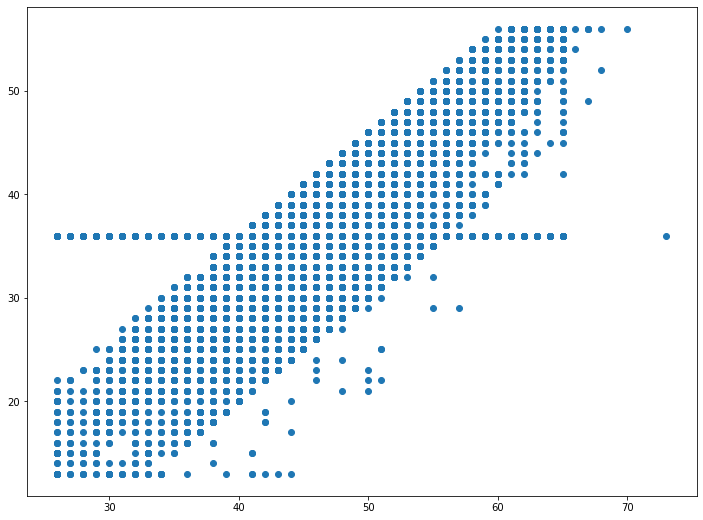

In [3]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Seleccionando datos
X = df.iloc[:, 2].to_numpy()
Y = df.iloc[:, 4]
plt.scatter(X, Y)
plt.show()

#### Descenso de gradiente

In [4]:
m = 0
c = 0

L = 0.0001  # La taza de aprendizaje
epochs = 1000  # Número de iteraciones para realizar el descenso de gradiente


n = float(len(X)) # Número de elementos en  X

# Realizando el descenso de gradiente 
for i in range(epochs): 
    Y_pred = m*X + c  # predicción actual del valor Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivada con respecto a m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivada con respecto a c
    m = m - L * D_m  # actualizamos m
    c = c - L * D_c  # actualizamos c
    
print (m, c)

0.7755775301565472 0.013377217274055902


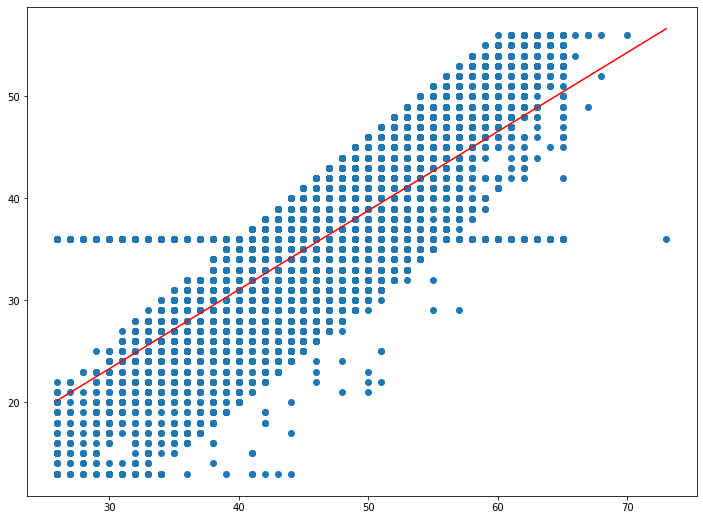

In [5]:
# Haciendo predicciones
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicción
plt.show()


### Utilizando SVD

para este caso utilizamos la funcion pinv de numpy que calcula la pseudoinversa utilizando la descomposicion en valores singulares que soluciona el problema de minimos cuadrados  

(10127, 1)
[0.77585803]


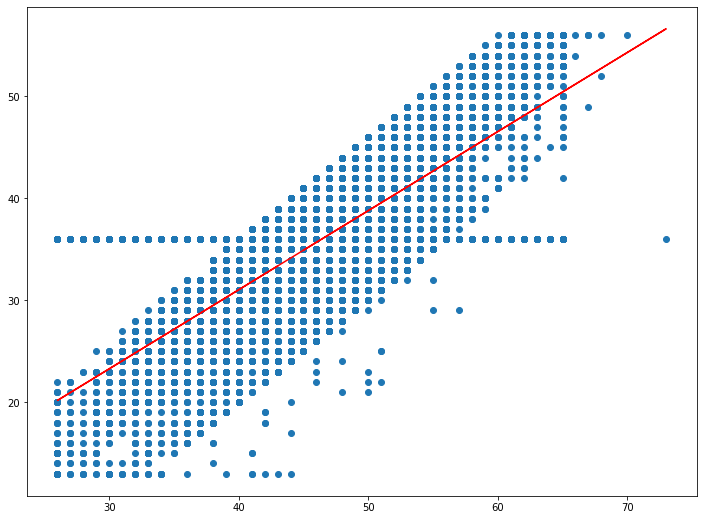

In [6]:

X1 = X.reshape((len(X), 1))
print(X1.shape)
# calculando coeficientes
b = pinv(X1).dot(Y)
print(b)
# predict using coefficients
yhat = X1.dot(b)
# plot data and predictions
plt.scatter(X1, Y)
plt.plot(X1, yhat, color='red')
plt.show()